In [2]:
import pandas as pd
data = pd.read_csv('adult.data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation', 'relationship', 'race', 'sex',
              'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


年齡和收入的關係是甚麼？

In [5]:
age = data['age']
income = data['income']

In [10]:
age_income = pd.concat([age, income], axis=1)
age_income.columns = ['age', 'income']  # 可以這樣設定列名

In [11]:
# 我想要在 income 中找出有幾種收入的類別

age_income['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='age'>

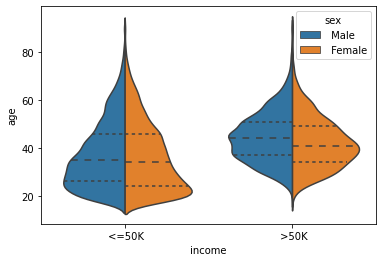

In [23]:
sns.violinplot(data=data, x="income", y="age", hue="sex", split=True, inner="quart")

哪些工作類型更容易賺到高薪？哪些工作類型更容易賺到低薪？

In [26]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [30]:
income_distribution_counts = data.groupby('workclass')['income'].value_counts().unstack()
income_distribution_counts

income,<=50K,>50K
workclass,,
?,1645.0,191.0
Federal-gov,589.0,371.0
Local-gov,1476.0,617.0
Never-worked,7.0,NaN
Private,17733.0,4963.0
Self-emp-inc,494.0,622.0
Self-emp-not-inc,1817.0,724.0
State-gov,945.0,353.0
Without-pay,14.0,NaN


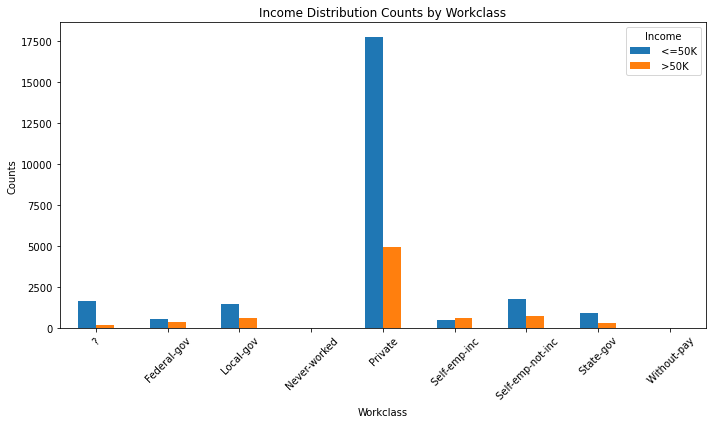

In [31]:
import matplotlib.pyplot as plt

# 繪製柱狀圖
income_distribution_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Income Distribution Counts by Workclass')  # 設定圖表標題
plt.xlabel('Workclass')  # 設定X軸標籤
plt.ylabel('Counts')  # 設定Y軸標籤
plt.xticks(rotation=45)  # 旋轉X軸標籤，以便更好地展示
plt.legend(title='Income')  # 設定圖例標題
plt.tight_layout()  # 自動調整子圖參數, 使之填充整個圖像區域
plt.show()

工作時間是否影響收入？

In [32]:
income_hours_distribution_counts = data.groupby('hours_per_week')['income'].value_counts().unstack()
income_hours_distribution_counts

income,<=50K,>50K
hours_per_week,,
1,18.0,2.0
2,24.0,8.0
3,38.0,1.0
4,51.0,3.0
5,53.0,7.0
...,...,...
95,1.0,1.0
96,4.0,1.0
97,1.0,1.0


<AxesSubplot:xlabel='income', ylabel='hours_per_week'>

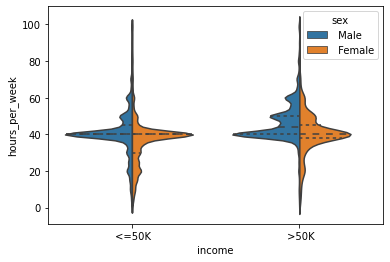

In [33]:
sns.violinplot(data=data, x="income", y="hours_per_week", hue="sex", split=True, inner="quart")

想看看工作時數少又收入高的是哪類人

In [39]:
filtered_df = data[(data['hours_per_week'] < 20) & (data['income'] == ' >50K')]
income_counts = filtered_df.groupby('workclass')['education'].value_counts().unstack()
income_counts

education,10th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
workclass,,,,,,,,,
?,NaN,2.0,1.0,11.0,3.0,3.0,5.0,2.0,5.0
Federal-gov,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
Local-gov,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN
Private,NaN,2.0,1.0,13.0,NaN,6.0,4.0,2.0,16.0
Self-emp-inc,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Self-emp-not-inc,1.0,1.0,3.0,8.0,NaN,4.0,3.0,2.0,9.0
State-gov,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


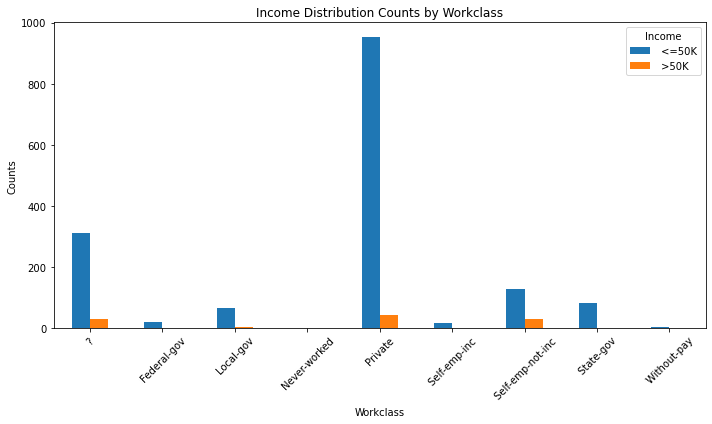

In [38]:
import matplotlib.pyplot as plt

# 繪製柱狀圖
income_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Income Distribution Counts by Workclass')  # 設定圖表標題
plt.xlabel('Workclass')  # 設定X軸標籤
plt.ylabel('Counts')  # 設定Y軸標籤
plt.xticks(rotation=45)  # 旋轉X軸標籤，以便更好地展示
plt.legend(title='Income')  # 設定圖例標題
plt.tight_layout()  # 自動調整子圖參數, 使之填充整個圖像區域
plt.show()

1. How many men and women (sex feature) are represented in this dataset?

In [6]:
sex_counts = data['sex'].value_counts()
sex_counts

 Male      21790
 Female    10771
Name: sex, dtype: int64

2. What is the average age (age feature) of women?

In [29]:
avg_age_women = data.loc[data['sex'] == 'Female', 'age'].mean()
avg_age_women

nan

In [25]:
data['sex'][0]

' Male'

In [26]:
data['sex'][4]

' Female'

In [28]:
avg_age_women = data.loc[data['sex'] == ' Female', 'age'].mean()
avg_age_women

36.85823043357163

3. What is the percentage of German citizens (native-country feature)?

In [31]:
german_citizens_count = len(data.loc[data['native_country'] == 'Germany'])
total_count = len(data)
percentage_german_citizens = (german_citizens_count / total_count) * 100
percentage_german_citizens

0.0

In [32]:
data['native_country'][0]

' United-States'

In [33]:
german_citizens_count = len(data.loc[data['native_country'] == ' Germany'])
total_count = len(data)
percentage_german_citizens = (german_citizens_count / total_count) * 100
percentage_german_citizens

0.42074874850281013

4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [36]:
rich_mean, rich_std = data.loc[data['income'] == ' >50K', 'age'].mean(), data.loc[data['income'] == ' >50K', 'age'].std()
poor_mean, poor_std = data.loc[data['income'] == ' <=50K', 'age'].mean(), data.loc[data['income'] == ' <=50K', 'age'].std()
print("Age statistics for those who earn more than 50K per year:")
print("Mean age: {:.2f} years".format(rich_mean))
print("Standard deviation of age: {:.2f} years".format(rich_std))
print("\nAge statistics for those who earn less than or equal to 50K per year:")
print("Mean age: {:.2f} years".format(poor_mean))
print("Standard deviation of age: {:.2f} years".format(poor_std))

Age statistics for those who earn more than 50K per year:
Mean age: 44.25 years
Standard deviation of age: 10.52 years

Age statistics for those who earn less than or equal to 50K per year:
Mean age: 36.78 years
Standard deviation of age: 14.02 years


6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [38]:
high_income_education_counts = data.loc[data['income'] == ' >50K', 'education'].value_counts()
high_income_education_counts

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: education, dtype: int64

7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [40]:
# Display age statistics for each race and each gender
race_gender_age_stats = data.groupby(['race', 'sex'])['age'].describe()
print(race_gender_age_stats)

# Find the maximum age of men of Amer-Indian-Eskimo race
max_age_AIE_men = data.loc[(data['race'] == ' Amer-Indian-Eskimo') & (data['sex'] == ' Male'), 'age'].max()
print("The maximum age of men of Amer-Indian-Eskimo race is:", max_age_AIE_men)

                               count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   ma

8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [53]:
def married_or_single(status):
    if status.startswith(' Married'):
        return 'Married'
    else:
        return 'Single'

In [54]:
# Apply the function to the marital_status column to create a new column for married or single
data['marital'] = data['marital_status'].apply(married_or_single)

# Count the number of individuals in each group based on marital status and income
counts = data.groupby(['marital', 'income']).size()

# Print the result
counts

marital  income
Married   <=50K     8681
          >50K      6736
Single    <=50K    16039
          >50K      1105
dtype: int64

In [52]:
data['marital_status'][0]

' Never-married'

In [51]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,marital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Single
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Single
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Single
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Single
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Single


9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [56]:
max_hours = data['hours_per_week'].max()

# Count the number of individuals who work the maximum number of hours per week
max_hours_count = len(data[data['hours_per_week'] == max_hours])

# Count the number of individuals who earn more than 50K per year among those who work the maximum number of hours per week
rich_max_hours_count = len(data[(data['hours_per_week'] == max_hours) & (data['income'] == ' >50K')])

# Calculate the percentage of those who earn more than 50K per year among those who work the maximum number of hours per week
rich_max_hours_percentage = (rich_max_hours_count / max_hours_count) * 100

print("The maximum number of hours a person works per week is:", max_hours)
print("{} people work {} hours per week".format(max_hours_count, max_hours))
print("Among those who work {} hours per week, {:.2f}% earn more than 50K per year".format(max_hours, rich_max_hours_percentage))

The maximum number of hours a person works per week is: 99
85 people work 99 hours per week
Among those who work 99 hours per week, 29.41% earn more than 50K per year


In [58]:
# Calculate the average time of work (hours-per-week) for each country and income level
country_income_mean = data.groupby(['native_country', 'income'])['hours_per_week'].mean()

# Print the result
print(country_income_mean)

# Calculate the average time of work (hours-per-week) for Japan and income level
japan_mean = data.loc[data['native_country'] == ' Japan'].groupby(['income'])['hours_per_week'].mean()

# Print the result
print("\nAverage time of work (hours-per-week) for Japan:")
print(japan_mean)

native_country  income
 ?               <=50K    40.164760
                 >50K     45.547945
 Cambodia        <=50K    41.416667
                 >50K     40.000000
 Canada          <=50K    37.914634
                            ...    
 United-States   >50K     45.505369
 Vietnam         <=50K    37.193548
                 >50K     39.200000
 Yugoslavia      <=50K    41.600000
                 >50K     49.500000
Name: hours_per_week, Length: 82, dtype: float64

Average time of work (hours-per-week) for Japan:
income
 <=50K    41.000000
 >50K     47.958333
Name: hours_per_week, dtype: float64
